In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Top 5 side effects: ['Nausea', 'Diarrhea', 'Vomiting', 'Headache', 'Dizziness']


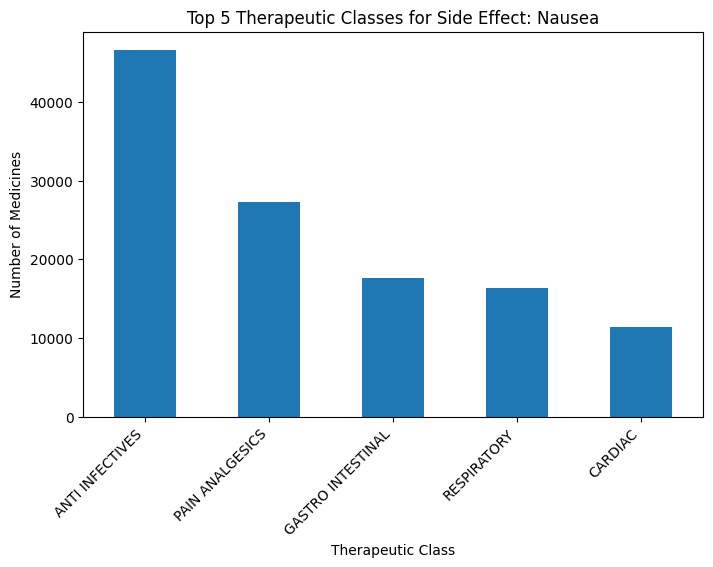

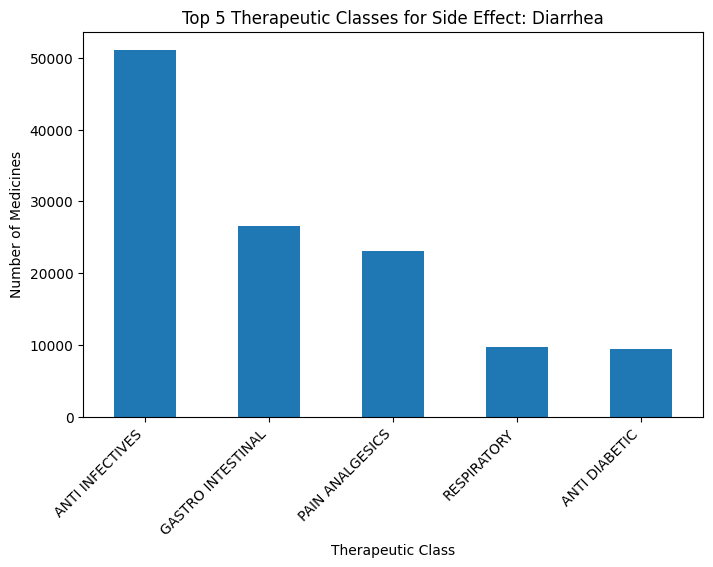

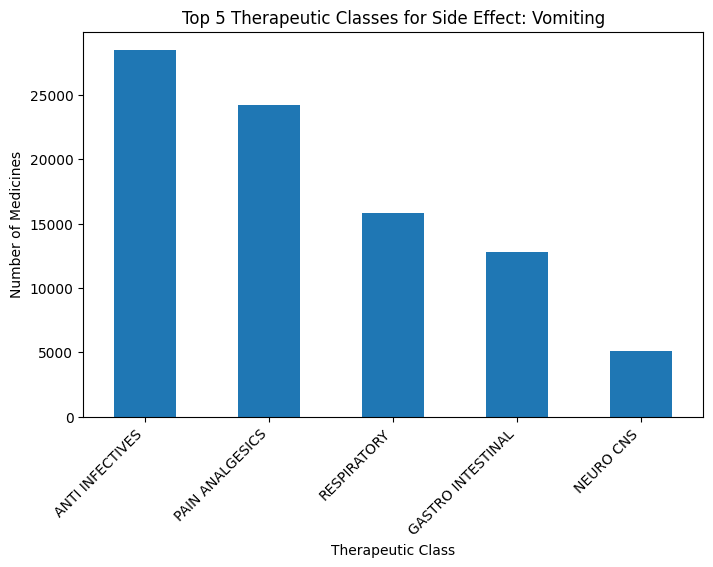

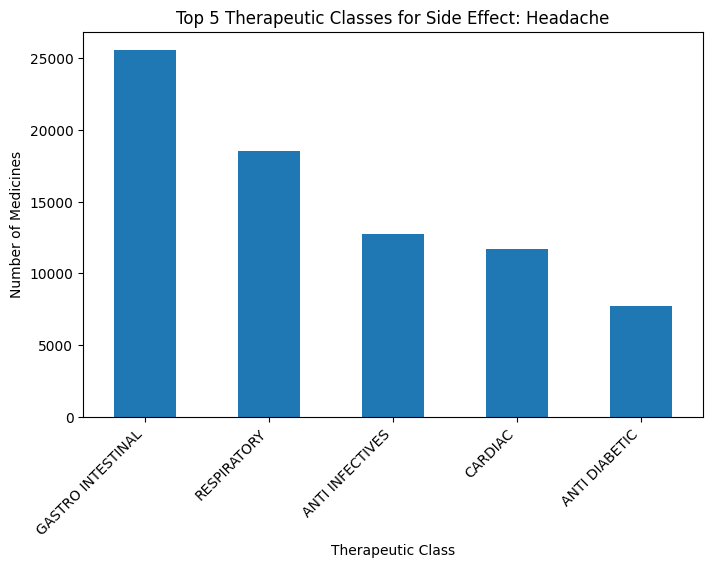

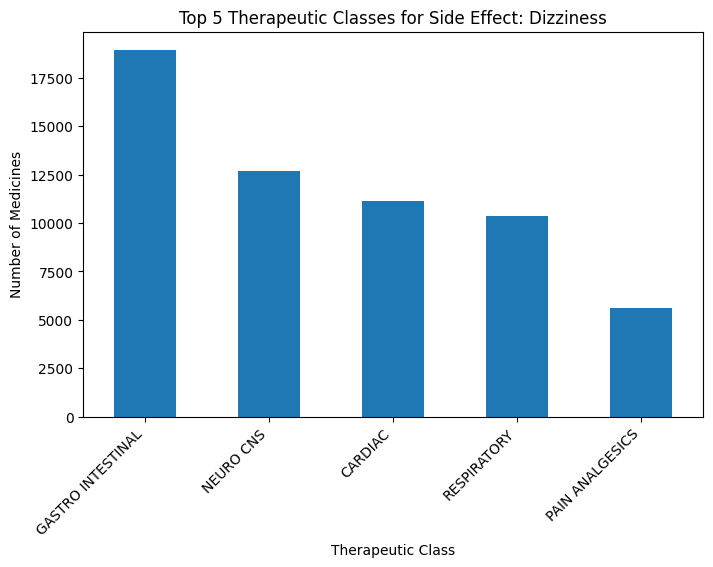

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/250k-medicines-usage-side-effects-and-substitutes/medicine_dataset.csv',
                 low_memory=False)

# All side effect columns
side_effect_cols = [col for col in df.columns if "sideEffect" in col]

# Flatten into one list
all_side_effects = df[side_effect_cols].values.ravel()
all_side_effects = pd.Series(all_side_effects).dropna()

# Top 5 most frequent side effects
top_5_effects = all_side_effects.value_counts().head(5).index.tolist()
print("Top 5 side effects:", top_5_effects)

# Function: get top 5 therapeutic classes for a side effect
def get_top_classes_for_side_effect(effect, top_n=5):
    mask = df[side_effect_cols].apply(lambda x: x.astype(str).str.contains(effect, case=False, na=False))
    subset = df.loc[mask.any(axis=1), ["Therapeutic Class"]]
    return subset["Therapeutic Class"].value_counts().head(top_n)

# Plot for each side effect
for effect in top_5_effects:
    counts = get_top_classes_for_side_effect(effect)
    plt.figure(figsize=(8,5))
    counts.plot(kind='bar')
    plt.title(f"Top 5 Therapeutic Classes for Side Effect: {effect}")
    plt.ylabel("Number of Medicines")
    plt.xticks(rotation=45, ha="right")
    plt.savefig(f"/kaggle/working/{effect}_top5_classes.png", bbox_inches='tight', dpi=300)
    plt.show()


In [11]:
# Build summary table for top 5 side effects and their top 5 therapeutic classes
summary = []

for effect in top_5_effects:
    counts = get_top_classes_for_side_effect(effect, top_n=5)
    for cls, cnt in counts.items():
        summary.append({
            "Side Effect": effect,
            "Therapeutic Class": cls,
            "Count": cnt
        })

summary_df = pd.DataFrame(summary)

# Show table in notebook
print("Summary table: Top 5 side effects × Top 5 therapeutic classes")
display(summary_df)

# Save as CSV for download
summary_df.to_csv("/kaggle/working/top5_sideeffects_vs_classes.csv", index=False)


Summary table: Top 5 side effects × Top 5 therapeutic classes


,Side Effect,Therapeutic Class,Count
0,Nausea,ANTI INFECTIVES,46597
1,Nausea,PAIN ANALGESICS,27357
2,Nausea,GASTRO INTESTINAL,17615
3,Nausea,RESPIRATORY,16310
4,Nausea,CARDIAC,11440
5,Diarrhea,ANTI INFECTIVES,51066
6,Diarrhea,GASTRO INTESTINAL,26581
7,Diarrhea,PAIN ANALGESICS,23103
8,Diarrhea,RESPIRATORY,9683
9,Diarrhea,ANTI DIABETIC,9374
